In [1]:
from pandas import datetime
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

df = pd.read_csv('DIVIDED.csv' , delimiter= ',')

<ipython-input-1-0a9820a4213b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df.head()

,Tarih(yil_ay),Saat,YukTahminPlan(MWh),PTF(TL/MWh),SMF(TL/MWh),KGUP(MWh),YAL0(MWh),YAL1(MWh),YAT0(MWh),YAT1(MWh),YAL TeslimEdilemeyenMiktar(MWh),YAT TeslimEdilemeyenMiktar(MWh),PFK Fiyat,SFK Fiyat
0,201802,0,33700,217.12,217.12,31061.72,129.602,0.0,80.833,0.0,35.2,4.00,80.02,79.89
1,201802,1,31500,203.28,213.20,28579.52,856.082,0.0,0.000,0.0,1975.6,0.00,80.02,79.89
2,201802,2,30200,175.04,175.04,27152.95,NaN,NaN,NaN,NaN,NaN,NaN,80.02,79.89
3,201802,3,29100,178.01,128.00,26367.11,0.000,0.0,943.950,0.0,0.0,155.43,80.02,79.89
4,201802,4,29100,132.10,125.00,26151.66,0.000,0.0,515.500,0.0,0.0,18.31,70.02,98.01


In [3]:
df['spread'] = df['SMF(TL/MWh)'] - df['PTF(TL/MWh)']
df.head()

,Tarih(yil_ay),Saat,YukTahminPlan(MWh),PTF(TL/MWh),SMF(TL/MWh),KGUP(MWh),YAL0(MWh),YAL1(MWh),YAT0(MWh),YAT1(MWh),YAL TeslimEdilemeyenMiktar(MWh),YAT TeslimEdilemeyenMiktar(MWh),PFK Fiyat,SFK Fiyat,spread
0,201802,0,33700,217.12,217.12,31061.72,129.602,0.0,80.833,0.0,35.2,4.00,80.02,79.89,0.00
1,201802,1,31500,203.28,213.20,28579.52,856.082,0.0,0.000,0.0,1975.6,0.00,80.02,79.89,9.92
2,201802,2,30200,175.04,175.04,27152.95,NaN,NaN,NaN,NaN,NaN,NaN,80.02,79.89,0.00
3,201802,3,29100,178.01,128.00,26367.11,0.000,0.0,943.950,0.0,0.0,155.43,80.02,79.89,-50.01
4,201802,4,29100,132.10,125.00,26151.66,0.000,0.0,515.500,0.0,0.0,18.31,70.02,98.01,-7.10


In [4]:
df['target_load'] = df['YAL0(MWh)'] + df['YAL1(MWh)'] - df['YAL TeslimEdilemeyenMiktar(MWh)'] - df['YAT0(MWh)'] - df['YAT1(MWh)'] + df['YAT TeslimEdilemeyenMiktar(MWh)']
df.head()

,Tarih(yil_ay),Saat,YukTahminPlan(MWh),PTF(TL/MWh),SMF(TL/MWh),KGUP(MWh),YAL0(MWh),YAL1(MWh),YAT0(MWh),YAT1(MWh),YAL TeslimEdilemeyenMiktar(MWh),YAT TeslimEdilemeyenMiktar(MWh),PFK Fiyat,SFK Fiyat,spread,target_load
0,201802,0,33700,217.12,217.12,31061.72,129.602,0.0,80.833,0.0,35.2,4.00,80.02,79.89,0.00,17.569
1,201802,1,31500,203.28,213.20,28579.52,856.082,0.0,0.000,0.0,1975.6,0.00,80.02,79.89,9.92,-1119.518
2,201802,2,30200,175.04,175.04,27152.95,NaN,NaN,NaN,NaN,NaN,NaN,80.02,79.89,0.00,NaN
3,201802,3,29100,178.01,128.00,26367.11,0.000,0.0,943.950,0.0,0.0,155.43,80.02,79.89,-50.01,-788.520
4,201802,4,29100,132.10,125.00,26151.66,0.000,0.0,515.500,0.0,0.0,18.31,70.02,98.01,-7.10,-497.190


In [5]:
len(df)

27168

In [6]:
df = df[df['target_load'].notna()]
len(df)

24967

In [7]:
df.head()

,Tarih(yil_ay),Saat,YukTahminPlan(MWh),PTF(TL/MWh),SMF(TL/MWh),KGUP(MWh),YAL0(MWh),YAL1(MWh),YAT0(MWh),YAT1(MWh),YAL TeslimEdilemeyenMiktar(MWh),YAT TeslimEdilemeyenMiktar(MWh),PFK Fiyat,SFK Fiyat,spread,target_load
0,201802,0,33700,217.12,217.12,31061.72,129.602,0.0,80.833,0.0,35.2,4.00,80.02,79.89,0.00,17.569
1,201802,1,31500,203.28,213.20,28579.52,856.082,0.0,0.000,0.0,1975.6,0.00,80.02,79.89,9.92,-1119.518
3,201802,3,29100,178.01,128.00,26367.11,0.000,0.0,943.950,0.0,0.0,155.43,80.02,79.89,-50.01,-788.520
4,201802,4,29100,132.10,125.00,26151.66,0.000,0.0,515.500,0.0,0.0,18.31,70.02,98.01,-7.10,-497.190
5,201802,5,29300,168.84,140.00,26377.46,0.000,0.0,829.700,0.0,0.0,176.09,70.02,98.01,-28.84,-653.610


In [8]:
df['Date'] = pd.date_range(start = '20180201' , freq = 'H' , periods = len(df))

In [9]:
df = df[['Date','target_load']]

In [10]:
df = df.set_index('Date')

In [11]:
df.head()

,target_load
Date,
2018-02-01 00:00:00,17.569
2018-02-01 01:00:00,-1119.518
2018-02-01 02:00:00,-788.520
2018-02-01 03:00:00,-497.190
2018-02-01 04:00:00,-653.610


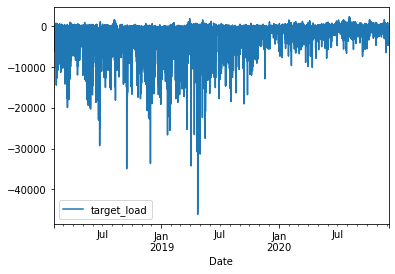

In [14]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [15]:
df.describe()

,target_load
count,24967.000000
mean,-1725.553359
std,2917.860970
min,-46157.823000
25%,-1913.487000
50%,-788.487000
75%,-278.338500
max,2387.363000


In [24]:
positive = 0
negative = 0

for n in df['target_load']:
    if n >= 0:
        positive +=1
    elif n<0:
        negative +=1


In [25]:
positive/(positive + negative)

0.10245524091801178

In [26]:
negative

22409

In [29]:
listt = [positive , negative]

In [30]:
listt

[2558, 22409]

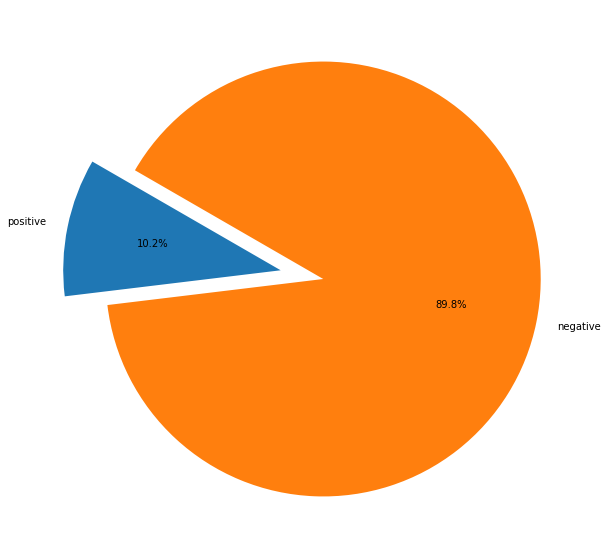

In [50]:
import matplotlib.pyplot as plt
labels = 'positive' , 'negative'
sizes = listt
explode =(0.2 , 0)
plt.figure(figsize=(16,10))

plt.pie(sizes , labels = labels ,autopct='%1.1f%%', startangle=150, explode=explode)
# plt.figure(figsize=(20,20))
plt.show()